In [263]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [264]:
credit_card_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/creditcard.csv')

In [265]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [266]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [267]:
credit_card_data.shape

(284807, 31)

In [268]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [269]:
credit_card_data.duplicated().sum()

1081

In [270]:
credit_card_data = credit_card_data.drop_duplicates()

In [271]:
credit_card_data.duplicated().sum()

0

# __Exploratory Data Analysis:__

In [272]:
#getting the number of legit and fraud transactions count based on the Class columns
credit_card_data['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [273]:
#separating the data into legit and fraud
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]
print(f'Number of legit transactions are : {len(legit)} and are of {round(len(legit)/len(credit_card_data) * 100,3)} % of the dataset')
print(f'Number of fraud transactions are : {len(fraud)} and are of {round(len(fraud)/len(credit_card_data) * 100,3)} % of the dataset')

Number of legit transactions are : 283253 and are of 99.833 % of the dataset
Number of fraud transactions are : 473 and are of 0.167 % of the dataset


Text(0.5, 1.0, 'Class Distribution (Pie chart)')

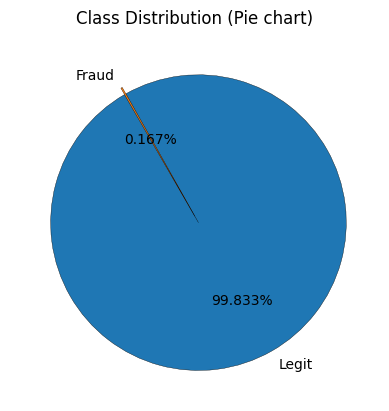

In [274]:
plt.pie(credit_card_data['Class'].value_counts(), labels=['Legit','Fraud'], autopct='%1.03f%%', startangle=120,explode = (0.05,0),
wedgeprops = {'edgecolor' : 'black','linewidth': 0.25,'antialiased' : True})
plt.title("Class Distribution (Pie chart)")

In [275]:
time_in_days = (credit_card_data['Time'].iloc[-1])/(60*60*24)
print(f'Number of days the transactions were taken: {round(time_in_days)} days')

Number of days the transactions were taken: 2 days


```
```
# __Imbalanced Data:__
```
Feeding Unbalanced data to the model will result in :

1. Biased Model
2. Overfitting
3. Misleading Accuracy

As the data is highly imbalanced we try to have a dataframe of equal number of legit and fraud transactions. This sampling is called under-sampling.
```

In [276]:
legit_sample = legit.sample(n=len(fraud))

In [277]:
legit_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202459,134339.0,1.973535,0.038745,-2.255683,0.469349,0.673960,-0.949059,0.500669,-0.339642,0.330305,...,-0.188430,-0.554377,0.106945,0.401392,0.011037,0.380377,-0.089807,-0.025491,70.90,0
262892,160699.0,-0.730131,1.501379,-1.172894,-1.399490,1.127780,-1.112876,1.505036,-0.191379,0.031866,...,0.190861,0.849771,-0.168805,0.780271,-0.198875,0.049498,0.697636,0.453094,7.70,0
196885,131742.0,-0.479445,-0.226258,0.225982,-3.273054,-0.277258,0.144144,-0.422536,0.444408,-2.454383,...,-0.102452,-0.050012,-0.252700,-1.404077,0.014319,-0.245084,0.001676,0.049140,25.85,0
144285,86001.0,-1.247423,1.479499,-2.036336,-0.251785,2.233647,3.206860,0.125552,1.050927,-0.636185,...,0.240119,0.373988,0.059529,1.017867,-0.715649,-0.515837,-0.881822,-0.241537,35.40,0
216768,140623.0,-1.108912,-0.359295,0.009065,-0.504187,1.727968,-1.202346,0.349888,-0.104864,0.616684,...,-0.282912,-0.537266,-0.208057,-0.536145,0.208573,-0.089823,-0.052434,-0.075002,40.00,0


In [278]:
main_data = pd.concat([legit_sample,fraud],axis=0)

In [279]:
print(main_data.shape)

(946, 31)


In [280]:
print('Legit transactions are', round(len(legit_sample)/len(main_data) * 100,3), '% of the dataset')
print('Fraud transactions are', round(len(fraud)/len(main_data) * 100,3), '% of the dataset')

Legit transactions are 50.0 % of the dataset
Fraud transactions are 50.0 % of the dataset


([<matplotlib.patches.Wedge at 0x7f9f850e9930>,
 [Text(-0.7392057511395205, -0.8809511095868247, 'legit'),
  Text(0.7070663706551936, 0.8426488874308756, 'fraud')],
 [Text(-0.4178119462962506, -0.49792888802733565, '50.0%'),
  Text(0.3856725658119237, 0.4596266658713867, '50.0%')])

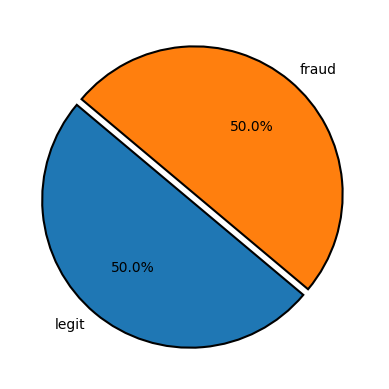

In [281]:
plt.pie(main_data['Class'].value_counts(), labels=['legit','fraud'], autopct='%1.1f%%',startangle=140,explode = (0.05,0),
wedgeprops = {'edgecolor' : 'black','linewidth': 1.5,'antialiased' : True})



```
```
# Splitting the data into Features and Targets
```
```


In [282]:
X = main_data.drop(columns = 'Class',axis =1)
Y = main_data['Class']

In [283]:
from sklearn.model_selection import train_test_split

In [284]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

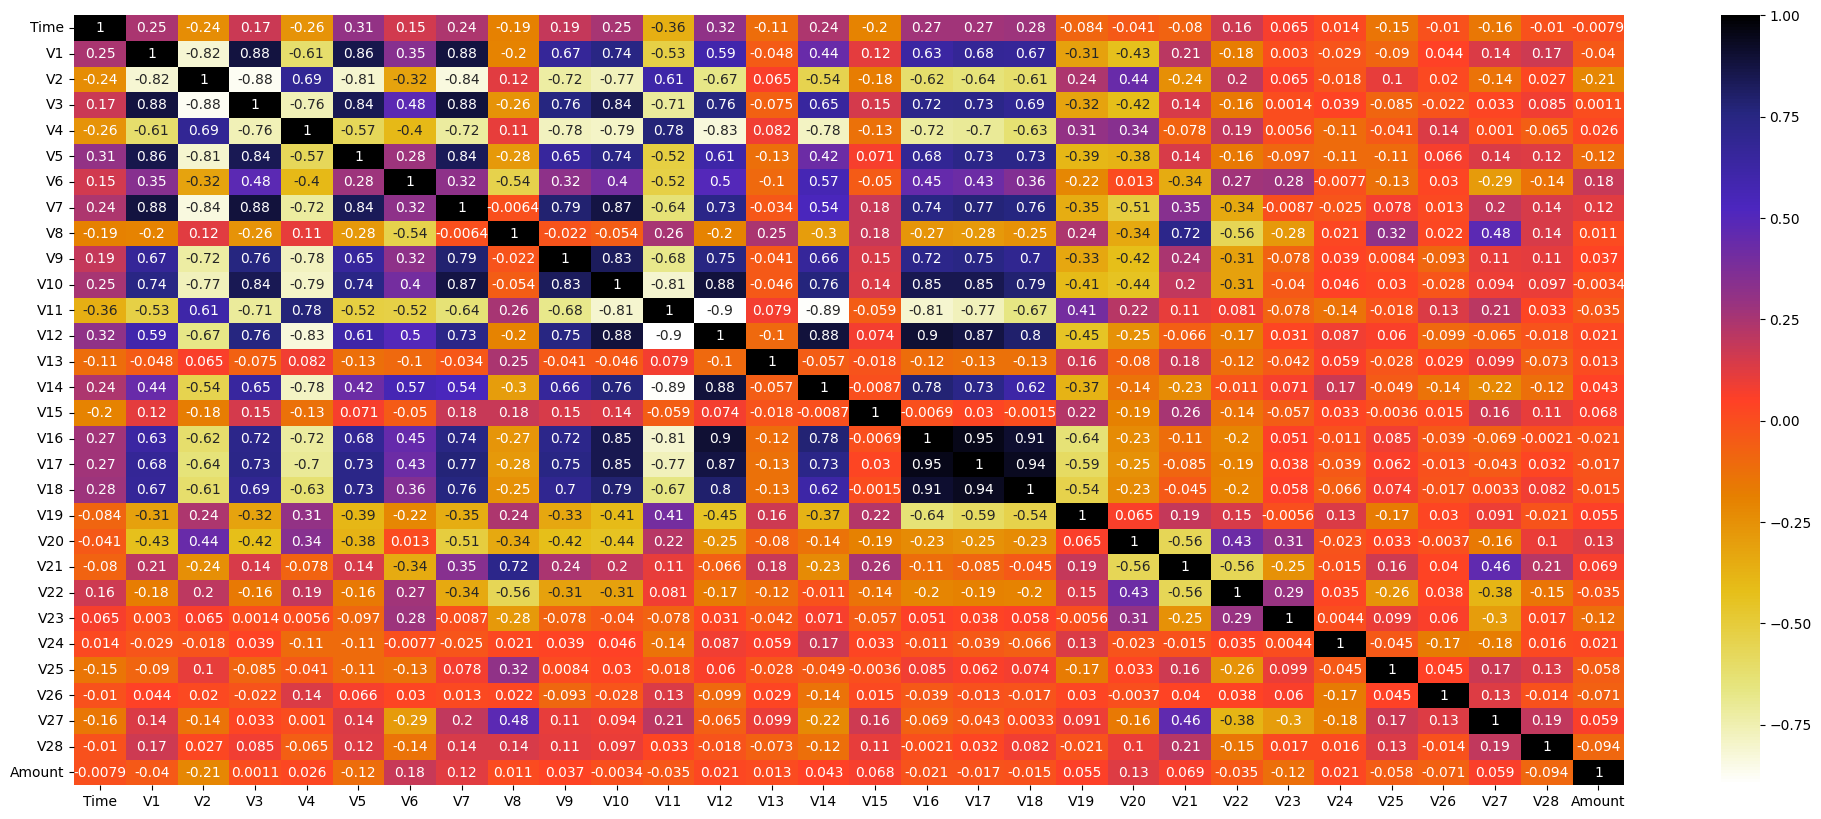

In [285]:
import seaborn as sns
plt.figure(figsize=(25,10))
corr= X_train.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [286]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [287]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

11

In [288]:
corr_features

{'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18', 'V2', 'V3', 'V5', 'V7'}

In [289]:
X_train=X_train.drop(corr_features,axis=1)
X_test=X_test.drop(corr_features,axis=1)
# X=X.drop(corr_features,axis=1)

In [290]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(946, 30)
(756, 19)
(190, 19)


In [291]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import svm

In [292]:
pre_processor = ColumnTransformer([
    ('scaler', RobustScaler(), slice(0, 30))
])

# Creating the pipelines with feature scaling and classifier

pipeline_lr = Pipeline([
    ('preprocessor', pre_processor),
    ('classifier', LogisticRegression())
])

pipeline_svm = Pipeline([
    ('preprocessor', pre_processor),
    ('classifier', svm.SVC(kernel='linear'))
])

pipeline_random = Pipeline([
    ('preprocessor', pre_processor),
    ('classifier', RandomForestClassifier(n_estimators=250,random_state=42,max_features=20))
])

In [293]:
pipeline_lr.fit(X_train, Y_train)
pipeline_svm.fit(X_train, Y_train)
pipeline_random.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaler', RobustScaler(),
                                                  slice(0, 30, None))])),
                ('classifier',
                 RandomForestClassifier(max_features=20, n_estimators=250,
                                        random_state=42))])

In [294]:
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_svm = pipeline_svm.predict(X_test)
y_pred_random = pipeline_random.predict(X_test)

In [295]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for Logistic Regression
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
precision_lr = precision_score(Y_test, y_pred_lr)
recall_lr = recall_score(Y_test, y_pred_lr)
f1_lr = f1_score(Y_test, y_pred_lr)

# Calculate precision, recall, and F1-score for SVM
accuracy_svm= accuracy_score(Y_test, y_pred_svm)
precision_svm = precision_score(Y_test, y_pred_svm)
recall_svm = recall_score(Y_test, y_pred_svm)
f1_svm = f1_score(Y_test, y_pred_svm)

# Calculate precision, recall, and F1-score for Random Forest Classifier
accuracy_rf= accuracy_score(Y_test, y_pred_random)
precision_rf = precision_score(Y_test, y_pred_random)
recall_rf = recall_score(Y_test, y_pred_random)
f1_rf = f1_score(Y_test, y_pred_random)

print("-" * 72)
print("| {:<15} | {:<20} | {:<12} | {:<12}|".format("Metric", "Logistic Regression", "SVM", "Random Forest"))
print("-" * 72)
print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} |".format("Accuracy", accuracy_lr, accuracy_svm, accuracy_rf))
print("-" * 72)
print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} |".format("Precision", precision_lr, precision_svm, precision_rf))
print("-" * 72)
print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} |".format("Recall", recall_lr, recall_svm, recall_rf))
print("-" * 72)
print("| {:<15} | {:<20.4f} | {:<12.4f} | {:<12.4f} |".format("F1-score", f1_lr, f1_svm, f1_rf))
print("-" * 72)

------------------------------------------------------------------------
| Metric          | Logistic Regression  | SVM          | Random Forest|
------------------------------------------------------------------------
| Accuracy        | 0.9053               | 0.9053       | 0.9053       |
------------------------------------------------------------------------
| Precision       | 0.9326               | 0.9425       | 0.9326       |
------------------------------------------------------------------------
| Recall          | 0.8737               | 0.8632       | 0.8737       |
------------------------------------------------------------------------
| F1-score        | 0.9022               | 0.9011       | 0.9022       |
------------------------------------------------------------------------


In [300]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(ax,y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    print(f"\nConfusion Matrix for {title}:")
    print(cm)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_title(f'Confusion Matrix for {title}')
    return cm


Confusion Matrix for Logistic Regression:
[[89  6]
 [12 83]]

Confusion Matrix for SVM:
[[90  5]
 [13 82]]

Confusion Matrix for Random Forest Classifier:
[[89  6]
 [12 83]]


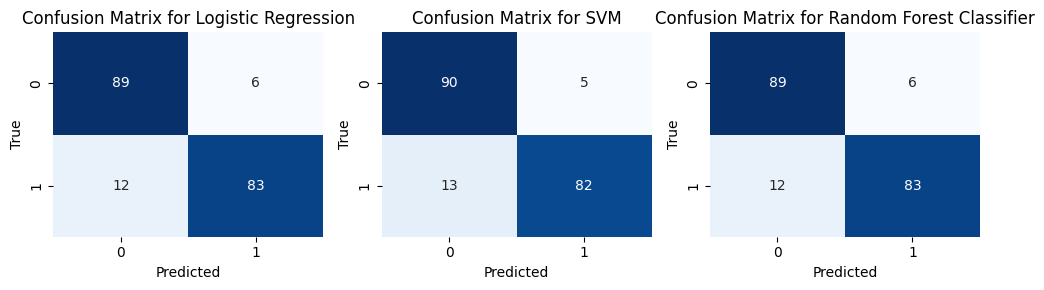

In [297]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3))
cm_lr = plot_confusion_matrix(axs[0],Y_test, y_pred_lr, "Logistic Regression")
cm_svm = plot_confusion_matrix(axs[1],Y_test, y_pred_svm, "SVM")
cm_rf = plot_confusion_matrix(axs[2],Y_test, y_pred_random, "Random Forest Classifier")
plt.tight_layout()
plt.show()

In [298]:
from sklearn.model_selection import cross_validate
scoring = ['accuracy','precision','recall','f1']
scores = cross_validate(pipeline_lr,X, Y,scoring=scoring,cv=10)
scores_svm = cross_validate(pipeline_svm,X, Y,scoring=scoring,cv=10)
scores_random = cross_validate(pipeline_random,X, Y,scoring=scoring,cv=10)

In [299]:
print("-" * 64)
print("| {:<15} | {:<12} | {:<12} | {:<12}|".format("Metric", "Logistic", "SVM", "Random Forest"))
print("-" * 64)
for i in scoring:
    strng = 'test_' + i
    logistic_mean = scores[strng].mean()
    svm_mean = scores_svm[strng].mean()
    random_mean = scores_random[strng].mean()
    print("| {:<15} | {:<12.4f} | {:<12.4f} | {:<12.4f} |".format(i.capitalize(), logistic_mean, svm_mean, random_mean))
    print("-" * 62)

----------------------------------------------------------------
| Metric          | Logistic     | SVM          | Random Forest|
----------------------------------------------------------------
| Accuracy        | 0.9323       | 0.9197       | 0.9366       |
--------------------------------------------------------------
| Precision       | 0.9678       | 0.9681       | 0.9637       |
--------------------------------------------------------------
| Recall          | 0.8968       | 0.8691       | 0.9096       |
--------------------------------------------------------------
| F1              | 0.9286       | 0.9129       | 0.9336       |
--------------------------------------------------------------
